In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000859222"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000859222
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"BAY BANCORP, INC."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,40.0,9.102250e+00,2.566095e+00,5.92,6.297500e+00,9.245,10.575,14.18
interest income,15.0,6.183470e+06,6.711878e+05,5114415.00,5.829965e+06,6089803.000,6548440.500,7393137.00
net income,43.0,3.462248e+05,6.986188e+05,-1188898.00,1.020015e+05,412596.000,537666.500,2755255.00
net interest income,43.0,4.121044e+06,1.275173e+06,2133753.00,3.362308e+06,3526410.000,5380453.500,6749326.00
provision for loan losses,43.0,4.532551e+05,5.258671e+05,0.00,1.280930e+05,298000.000,508666.500,2461991.00


# Plots

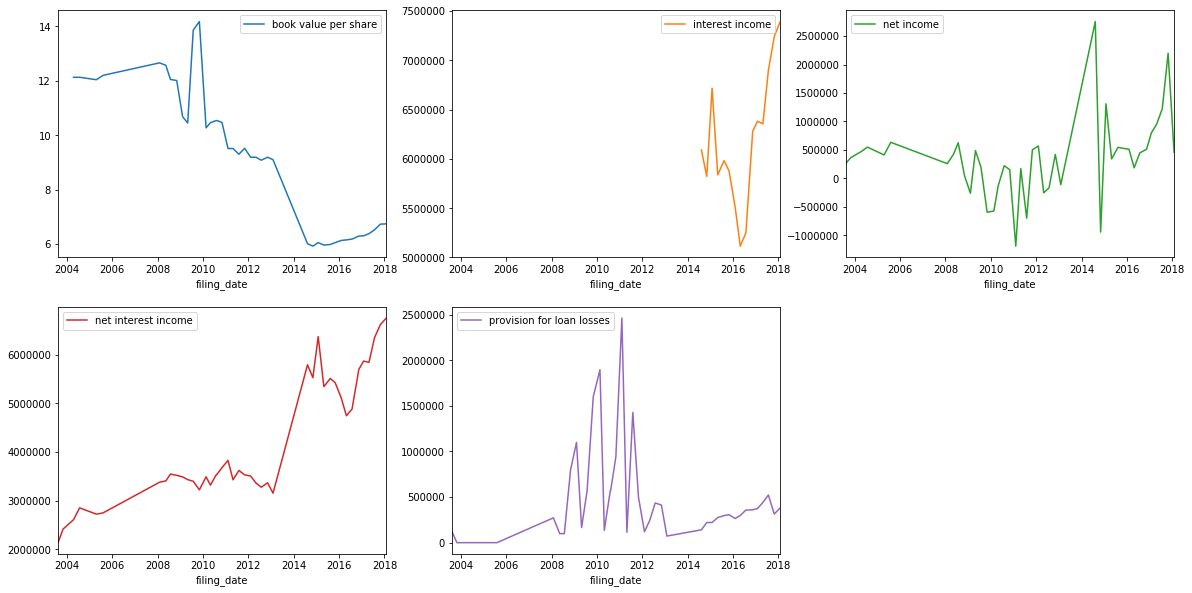

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000859222 book value per share        2003Q2 to 2003Q4: 3 periods  missing   
           book value per share        2004Q2 to 2004Q4: 3 periods  missing   
           book value per share        2005Q3 to 2007Q3: 9 periods  missing   
           book value per share        2013Q1 to 2014Q1: 5 periods  missing   
           interest income            2003Q2 to 2014Q1: 44 periods  missing   
           net income                                       2003Q4  missing   
           net income                  2004Q3 to 2004Q4: 2 periods  missing   
           net income                  2005Q3 to 2007Q3: 9 periods  missing   
           net income                  2013Q1 to 2014Q1: 5 periods  missing   
           net interest income                              2003Q4  missing   
           net interest income         2004Q3 to 2004Q4: 2 periods  missing   
           net interest income         2005Q3 to 2007Q3: 9 periods  missing   
           net interest income         2013Q1 to 2014Q1: 5 periods  missing   
           provision for loan losses                        2003Q4  missing   
           provision for loan losses   2004Q3 to 2004Q4: 2 periods  missing   
           provision for loan losses   2005Q3 to 2007Q3: 9 periods  missing   
           provision for loan losses   2013Q1 to 2014Q1: 5 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000859222 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()